# QUIZ 1: COUNT OBJECTS

Total # of objects: 20


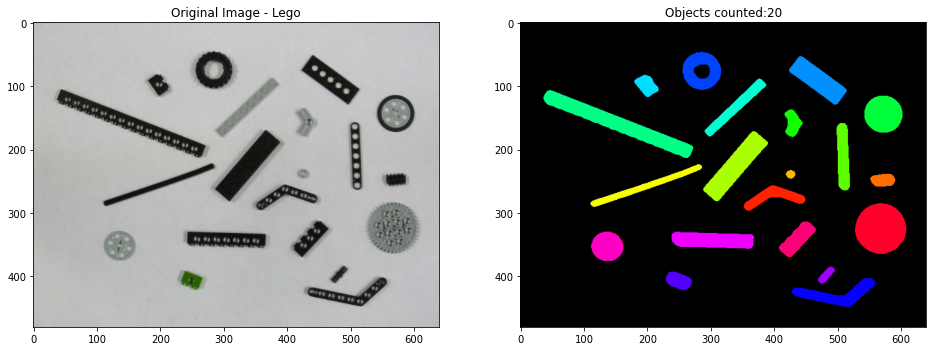

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image from .png file and assign to variable
img = cv2.imread('lego1.png')

# Convert image from one color space to another using cv2.cvtColor() method. In this case, convert between RGB/BGR and grayscale.
gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarization using Adaptive Gaussian Thresholding - The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C
thresh = cv2.adaptiveThreshold(gray_im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
thresh = cv2.bitwise_not(thresh)

# Morphological image processing using Dilation and Erosion with kernel size of 12 x 12 full of ones
kernel = np.ones((12,12), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)

# Image smoothing using Median Blurring to reduce noise
img_erode = cv2.medianBlur(img_erode, 7)

# Labelling of connected components 
ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels)) 
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0 

# Display output
NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))
ax[0].imshow(img)
ax[1].imshow(labeled_img)
ax[0].set_title('Original Image - Lego')
ax[1].set_title('Objects counted:'+ str(ret-1))

print('Total # of objects:', ret-1)
plt.show()